# <center><span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea">Assignment 1: Data Exploration</span></center>

&nbsp;

## <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Cardio Good Fitness</span>

&nbsp;

<p align="center" style="font-family: Arial;color:#0e92ea;font-size:1em;">
The data is about customers of the treadmill product(s) of a retail store called <b>Cardio Good Fitness</b>. This Dashboards explores the CSV data provided, generate key business insights identifying customer profiles and recommendations on the actions the company could take when targeting new customers.
</p>

##  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Contents:</span>

<ol style="font-family: Arial;color:#0e92ea;font-size:1em;">
    <li>Import necessary libraries and Load Data</li>
    <li>Import necessary libraries and Load Data</li>
    <li>Univariate Data Analysis</li>
    <li>Checking distribution of data</li>
    <li>Multivariate Data Analysis</li>
    <li>Conclusion and Recommendations</li>
</ol>

####  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Setup (Import Modules):

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling                            # Used to create profile summary of the data

import warnings
warnings.filterwarnings('ignore')                  # Ignore warnings

sns.set(color_codes=True)                          # Displays charts with background colors
%matplotlib inline

main_data= pd.read_csv('CardioGoodFitness.csv');   # Load the data

####  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> 1. Scan The Data:
   
<p align="center">
Eplore the data structure
</p>

In [2]:
nulls_series             = main_data.isna().sum()      # Get a series counting number of empty values for each column
nonnulls_series          = main_data.notnull().sum()   # Get a series counting number of non empty valuesfor each column 
column_datatypes         = main_data.dtypes            # Get a series containing data types for each column 


nulls_count_df = pd.concat(
    [nulls_series, nonnulls_series, column_datatypes],               
    axis=1,                                            # Concatenate using columns as axis. 
    keys=["Nulls", "Non-Nulls", "Type"],               # Add Columns as for the nulls and non-nulls values
    sort=True)


print(" ")
print("Rows x Columns = " + str(main_data.shape))      # Print out the dimensions of the data frame


print(" ")
print(nulls_count_df)                                  # Display the nulls count table

 
Rows x Columns = (180, 9)
 
               Nulls  Non-Nulls    Type
Age                0        180   int64
Education          0        180   int64
Fitness            0        180   int64
Gender             0        180  object
Income             0        180   int64
MaritalStatus      0        180  object
Miles              0        180   int64
Product            0        180  object
Usage              0        180   int64


In [3]:
distribution_df = main_data.describe()
main_data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [4]:
main_data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


####  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> 2. Univariate Data Analysis:
   
<p align="center">
Eplore indiviual columns.
</p>

 <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea">2.1 Set Up Dashboard Theme:

In [28]:
default_colors      = ["#4FC3F7","#E65100", "#E91E63", "#4CAF50"]       # Set red and blue for good and bad colors
good_and_bad_colors = ["#D50000", "00E676"]                  # Set red and blue for good and bad colors
gender_palette      = {"Female":"#E91E63", "Male":"#42A5F5"} # Set of gender based colors to use (pink and blue)

sns.set_theme(
    context="notebook",
    font_scale=1.5,                                          # Set default font size.
    style="darkgrid");                                       # Set theme stylesns.set_palette(sns.color_palette(default_colors)) 

sns.set_palette(sns.color_palette(default_colors))

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea">2.2 Exploring The Distribution of Each column:

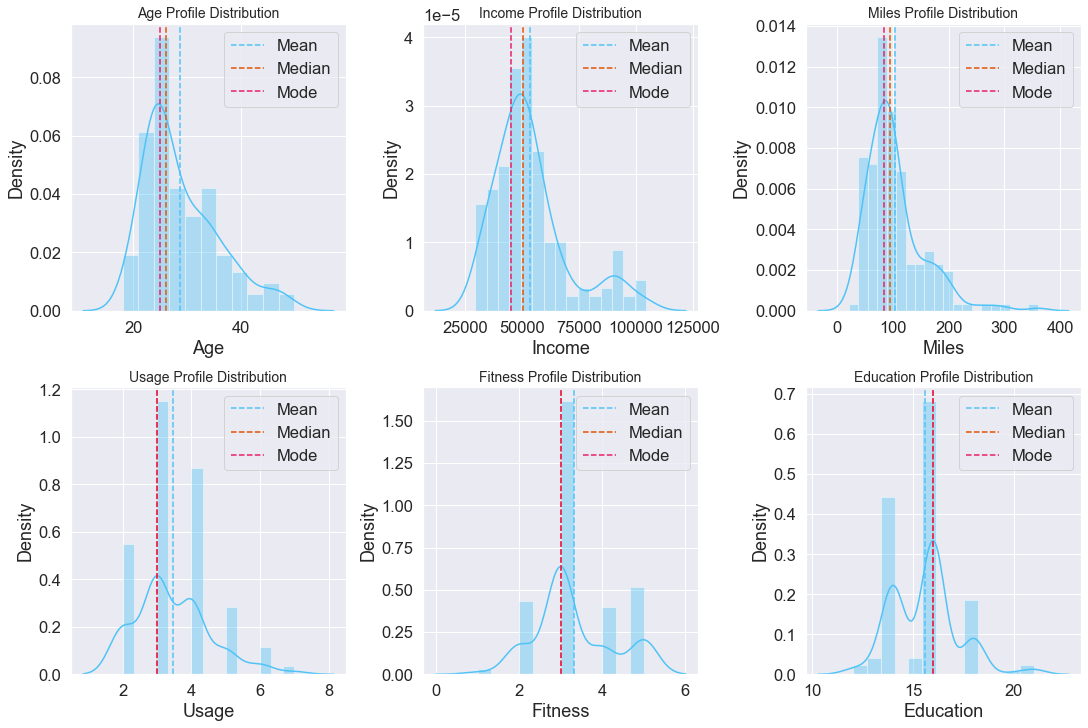

In [29]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,10), constrained_layout=True)

def plot_distribution_chart(ax, df_column_name):
    ax = sns.distplot(main_data[df_column_name], ax=ax);
    ax.set_xlabel(df_column_name)
    ax.set_title(df_column_name + ' Profile Distribution', fontsize=14)
    ax.axvline(main_data[df_column_name].mean(), color=default_colors[0], label='Mean', linestyle="dashed");
    ax.axvline(main_data[df_column_name].median(), color=default_colors[1], label='Median', linestyle="dashed");
    ax.axvline(main_data[df_column_name].mode()[0], color=default_colors[2], label='Mode', linestyle="dashed");
    ax.legend()
    
continuous_data_column_names = ['Age', 'Income', 'Miles', 'Usage', 'Fitness', 'Education']
count =0

for ax in axs.flat:
    plot_distribution_chart(ax, continuous_data_column_names[count])
    count = count + 1

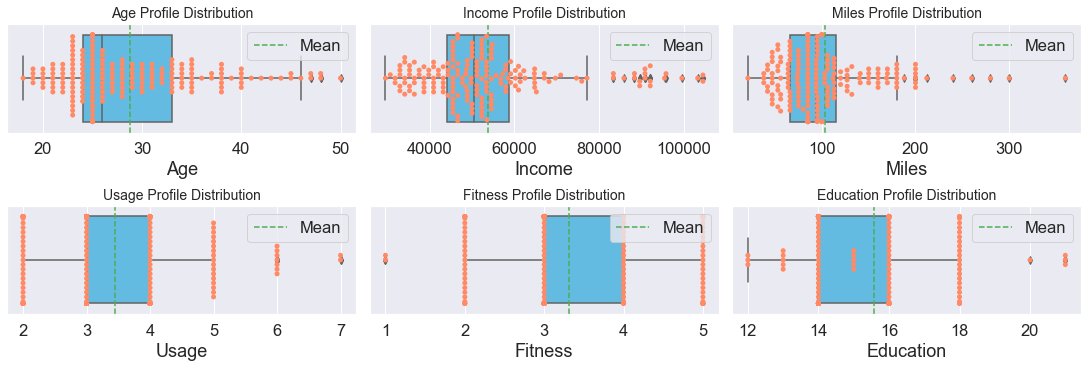

In [30]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,5), constrained_layout=True)

def plot_box_chart(ax, df_column_name):
    ax = sns.boxplot(x=df_column_name, data=main_data, ax = ax)
    sns.swarmplot(x=main_data[df_column_name], ax = ax, color="#FF8A65")
    ax.set_xlabel(df_column_name)
    ax.set_title(df_column_name + ' Profile Distribution', fontsize=14)
    ax.axvline(main_data[df_column_name].mean(), color=default_colors[3], label='Mean', linestyle="dashed");
    ax.legend()
    ax.legend(loc='upper right')

continuous_data_column_names = ['Age', 'Income', 'Miles', 'Usage', 'Fitness', 'Education']
count =0

for ax in axs.flat:
    plot_box_chart(ax, continuous_data_column_names[count])
    count = count + 1

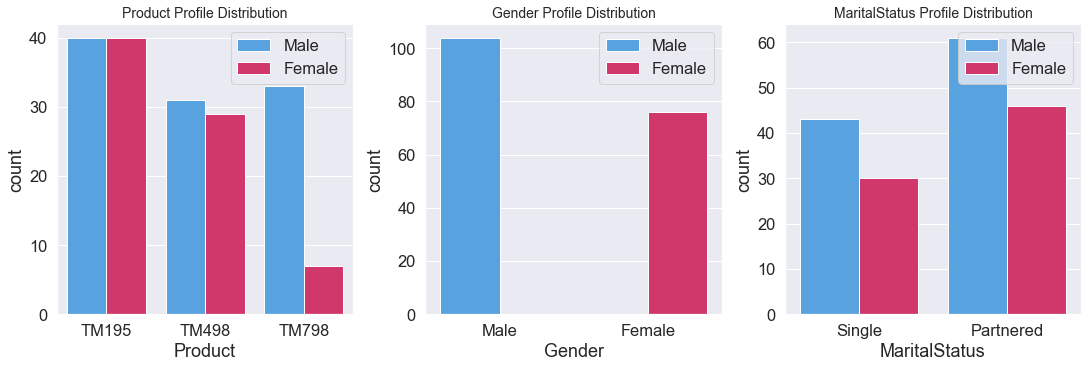

In [31]:
fig, axs = plt.subplots(
    nrows=1,
    ncols=3,
    figsize=(15,5),
    constrained_layout=True)

def plot_cartegorial_charts(ax, df_column_name):
    ax = sns.countplot(
        data=main_data,
        x=main_data[df_column_name],
        hue="Gender",
        palette=gender_palette,
        ax=ax)
    ax.set_title(df_column_name + ' Profile Distribution', fontsize=14)
    ax.legend(loc='upper right')

columns = ['Product', 'Gender', 'MaritalStatus']
count =0;

for ax in axs.flat:
    if count < 3:
        plot_cartegorial_charts(ax, columns[count])
    count = count + 1

####  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> 3. Multivariate Data Analysis:
   
<p align="center">
Multivariate Data Analysis
</p>

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea">3.2 Overview

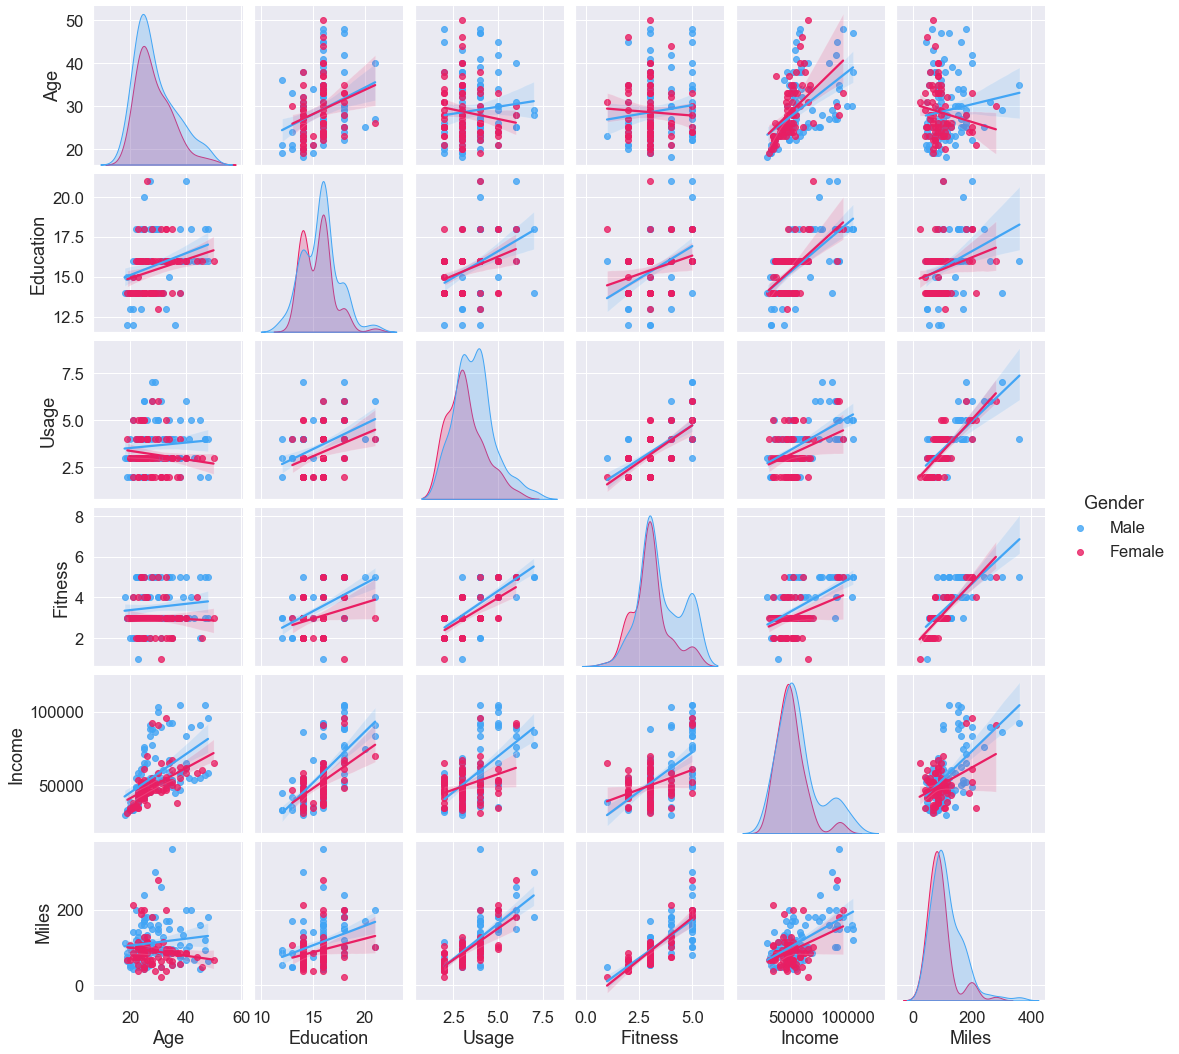

In [9]:
sns.pairplot(data=main_data, hue="Gender", kind="reg", palette=gender_palette);

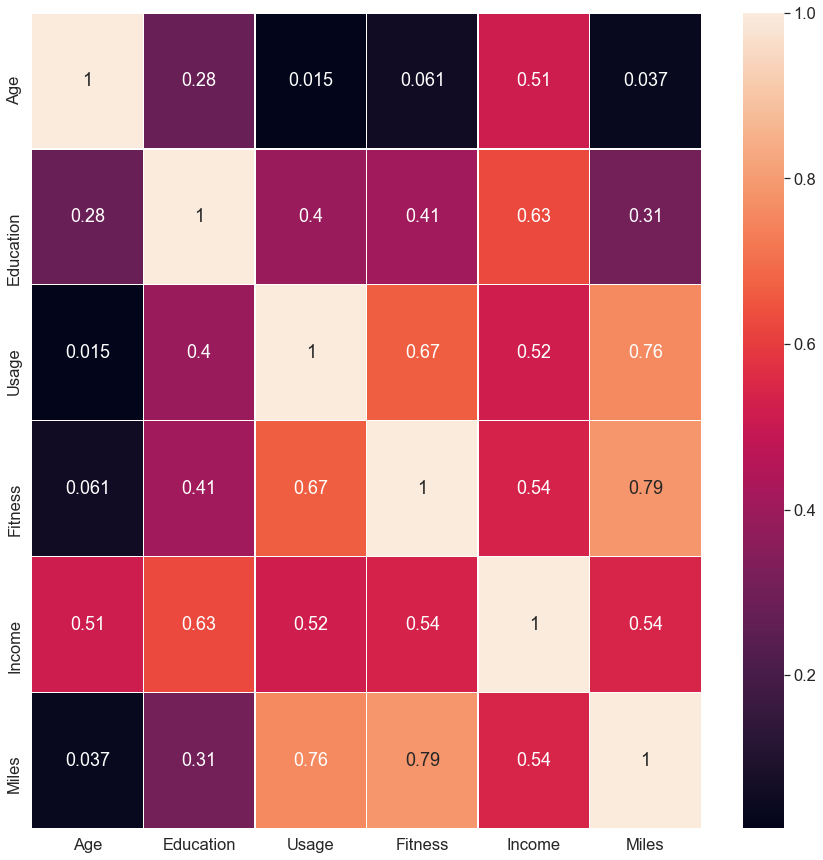

In [10]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(data=main_data.corr(), annot=True, linewidths=.5, ax=ax);

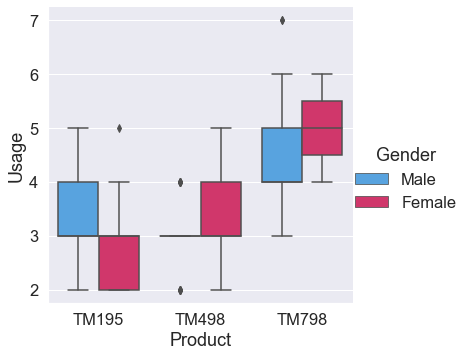

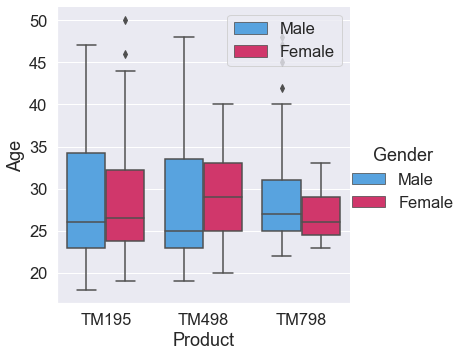

In [11]:
sns.catplot(data=main_data, x="Product", y="Usage", hue="Gender", kind="box", palette=gender_palette);
sns.catplot(data=main_data, x="Product", y="Age", hue="Gender", kind="box", palette=gender_palette);

plt.legend(loc='upper right')

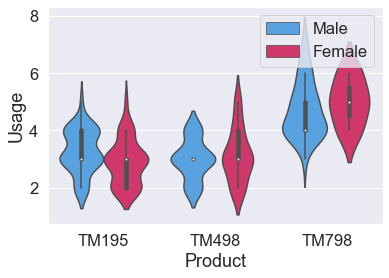

In [12]:
sns.violinplot(data=main_data, x="Product", y="Usage", hue="Gender", kind="box", palette=gender_palette);
plt.legend(loc='upper right')

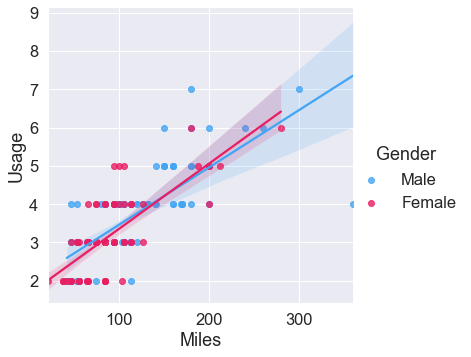

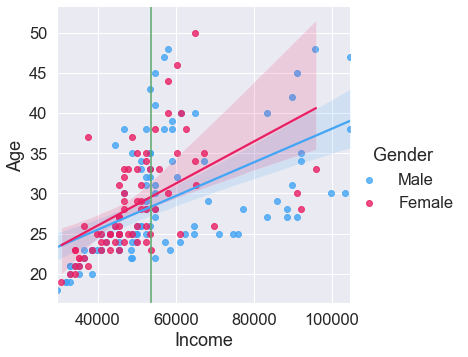

In [13]:
sns.lmplot(data=main_data, x="Miles", y="Usage", hue="Gender", palette=gender_palette);
sns.lmplot(data=main_data, x="Income", y="Age", hue="Gender", palette=gender_palette);
plt.axvline(main_data["Income"].mean(), color='g', label='{:5.0f}');

scatter
kde


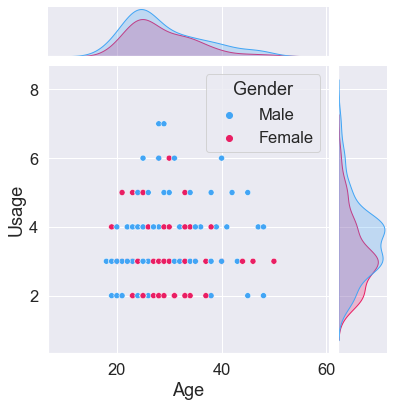

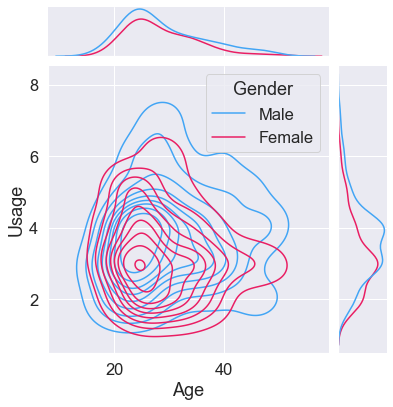

In [14]:
kinds = ['scatter', 'kde']

for chart_kind in kinds:
    print(chart_kind)
    sns.jointplot(data=main_data, x="Age", y="Usage", hue="Gender", kind=chart_kind, palette=gender_palette)

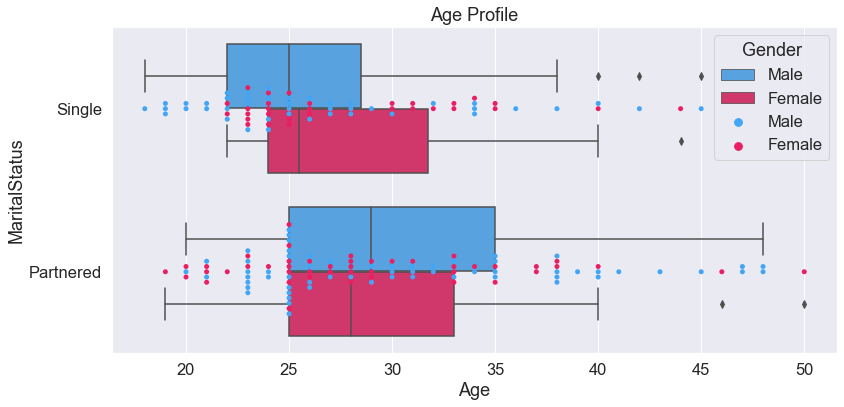

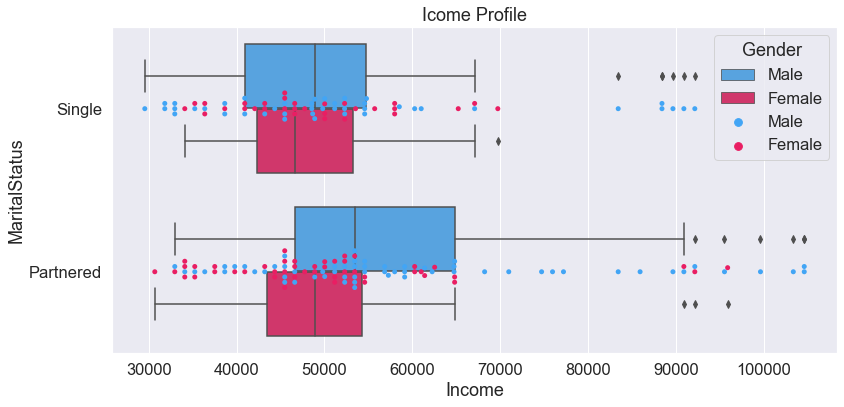

In [15]:
plt.subplots(figsize=(13, 6))                          # Set chart size
axs = sns.boxplot(x="Age",
            y="MaritalStatus",
            data=main_data,
            palette=gender_palette,
            hue="Gender")
axs.set_title("Age Profile")
sns.swarmplot(x=main_data['Age'], y=main_data['MaritalStatus'], hue=main_data['Gender'], palette=gender_palette)

plt.subplots(figsize=(13, 6))
axs = sns.boxplot(
            x="Income",
            y="MaritalStatus",
            data=main_data,
            palette=gender_palette,
            hue="Gender")
axs.set_title("Icome Profile")
sns.swarmplot(x=main_data['Income'], y=main_data['MaritalStatus'], hue=main_data['Gender'], palette=gender_palette)
plt.show()

####  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> 4. Recommendations:
   
<p align="center">
Multivariate Data Analysis
</p>